## Abstract

- NaiveBayesClassifier, SupportVectorMachine, DecisionTreeClassifier, LogisticRegression, MLP, RandomForestClassifier, AdaBoostCalssifier를 활용해 Diabetes 분류에 가장 적합한 모델을 찾는다.
- Tree 모델들로부터의 RFE 및 Correlation을 바탕으로 Feature Selection을 진행해보고 그 의미를 탐색한다.
- 모델 성능에 대한 지표들 및 도메인적 요소를 고려하여 여러 모델들의 결과를 분석한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

## 1. Data

### 1-1. Data Description
**Diabetes**, Hypertension and Stroke Prediction  

(https://www.kaggle.com/datasets/prosperchuks/health-dataset)  

(License: https://creativecommons.org/publicdomain/zero/1.0/)
- This is a clean dataset of over 70,692 survey responses to the CDC's BRFSS2015. 
- There are 18 feature variables and 3 target variables, Diabetes, Hypertension, and Stroke, each target variable having 2 classes. This dataset is **balanced**.
- 이 중 **Diabetes(당뇨병)**에 대한 데이터를 사용하여 classification을 진행하였습니다.

In [2]:
# Data의 경우 다운로드 받아 사용하였으며 압축 폴더 내 존재합니다.
raw_df = pd.read_csv('./diabetes_data.csv')

In [3]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,70682,70683,70684,70685,70686,70687,70688,70689,70690,70691
Age,4.0,12.0,13.0,11.0,8.0,1.0,13.0,6.0,3.0,6.0,...,9.0,10.0,9.0,7.0,11.0,6.0,10.0,13.0,11.0,9.0
Sex,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
HighChol,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
CholCheck,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0,18.0,26.0,31.0,32.0,27.0,...,37.0,28.0,27.0,38.0,27.0,37.0,29.0,25.0,18.0,25.0
Smoker,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
PhysActivity,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Fruits,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
Veggies,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### 1-2. Features
1.   **Age** : 13-level age category  
        1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 /  
        6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 /  
        11 = 70-74 / 12 = 75-79 /  13 = 80 or older
2.   **Sex** : patient's gender  
0 = female  
1 = male
3.   **HighChol** :  
0 = no high cholesterol  
1 = high cholesterol
4.   **CholCheck** :  
0 = no cholesterol check in 5 years  
1 = yes cholesterol check in 5 years
5.   **BMI** :  
Body Mass Index
6.   **Smoker** : Have you smoked at least 100 cigarettes in your entire life?  
[Note: 5 packs = 100 cigarettes]  
0 = no  
1 = yes
7.   **HeartDiseaseorAttack** : coronary heart disease (CHD) or myocardial infarction (MI)   
0 = no  
1 = yes
8.   **PhysActivity** : physical activity in past 30 days - not including job  
0 = no  
1 = yes
9.   **Fruits** : Consume Fruit 1 or more times per day   
0 = no  
1 = yes
10.  **Veggies** : Consume Vegetables 1 or more times per day  
0 = no  
1 = yes
11.  **HvyAlcoholConsump** : adult men >=14 drinks per week; adult women>=7 drinks per week  
0 = no  
1 = yes
12.  **GenHlth** : Would you say that in general your health is: scale 1-5  
1 = excellent  
2 = very good  
3 = good  
4 = fair  
5 = poor
13.  **MentHlth** : days of poor mental health scale 1-30 days  
1 = excellent  
...  
30 = poor
14.  **PhysHlth** : physical illness or injury days in past 30 days scale 1-30  
1 = excellent  
...  
30 = poor
15.  **DiffWalk** : Do you have serious difficulty walking or climbing stairs?  
0 = no  
1 = yes
16.  **Stroke** : you ever had a stroke.  
0 = no  
1 = yes
17.  **HighBP** : BP : Blood Pressure  
0 = no high BP  
1 = high BP

- *Class* **Diabetes**  :  
    0 = no diabetes  
    1 = diabetes

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


### 1-3. EDA

#### Missing value 체크 - 없음

In [6]:
raw_df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

#### 각 column 별 분포 확인

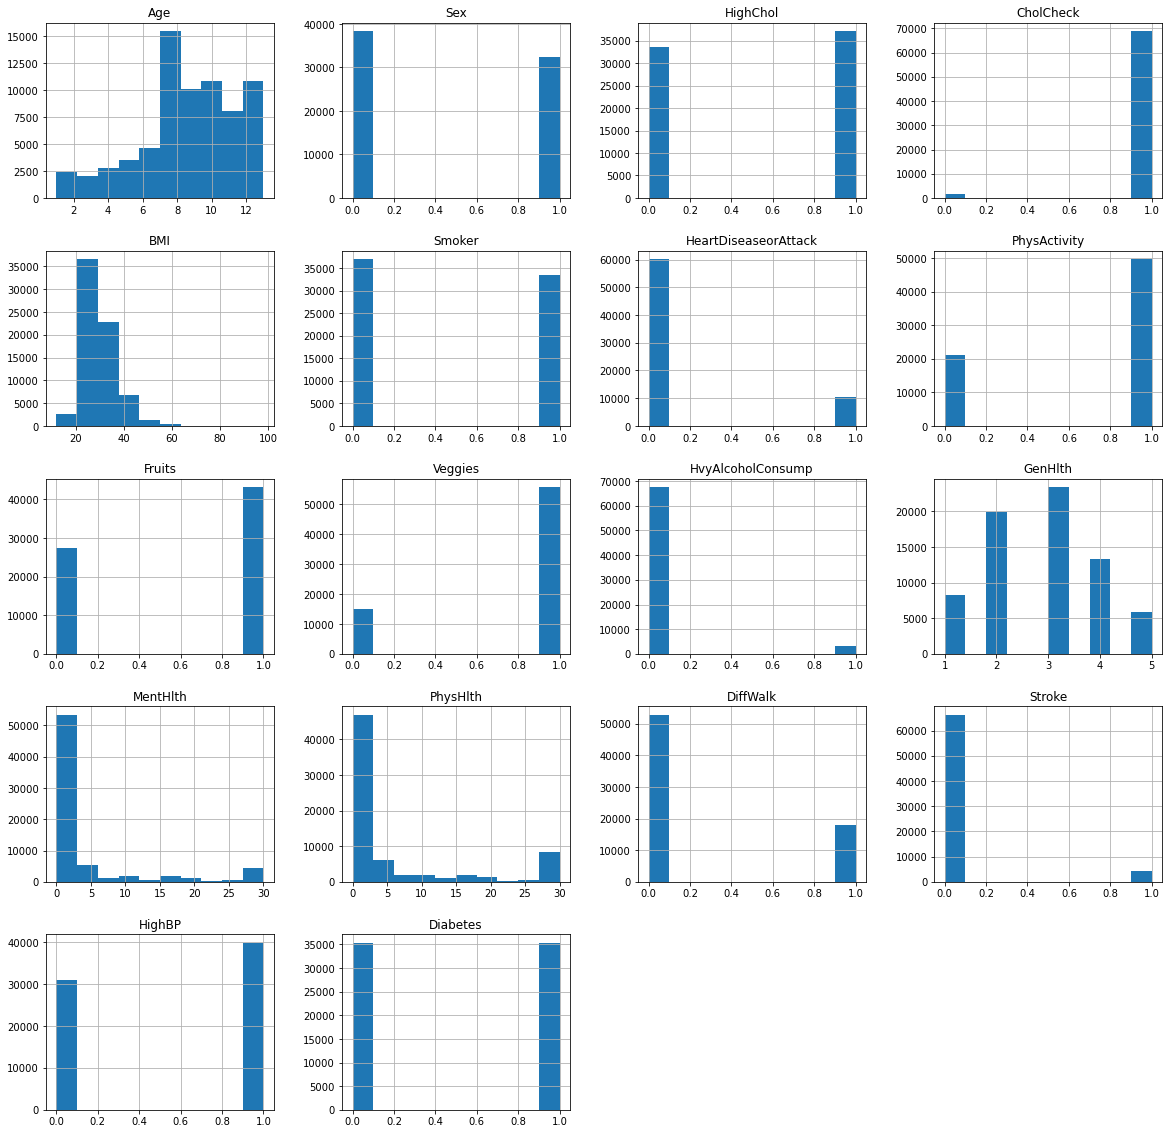

In [7]:
raw_df.hist(figsize=(20,20))
plt.show()

#### 각 column 별 class 비율 확인

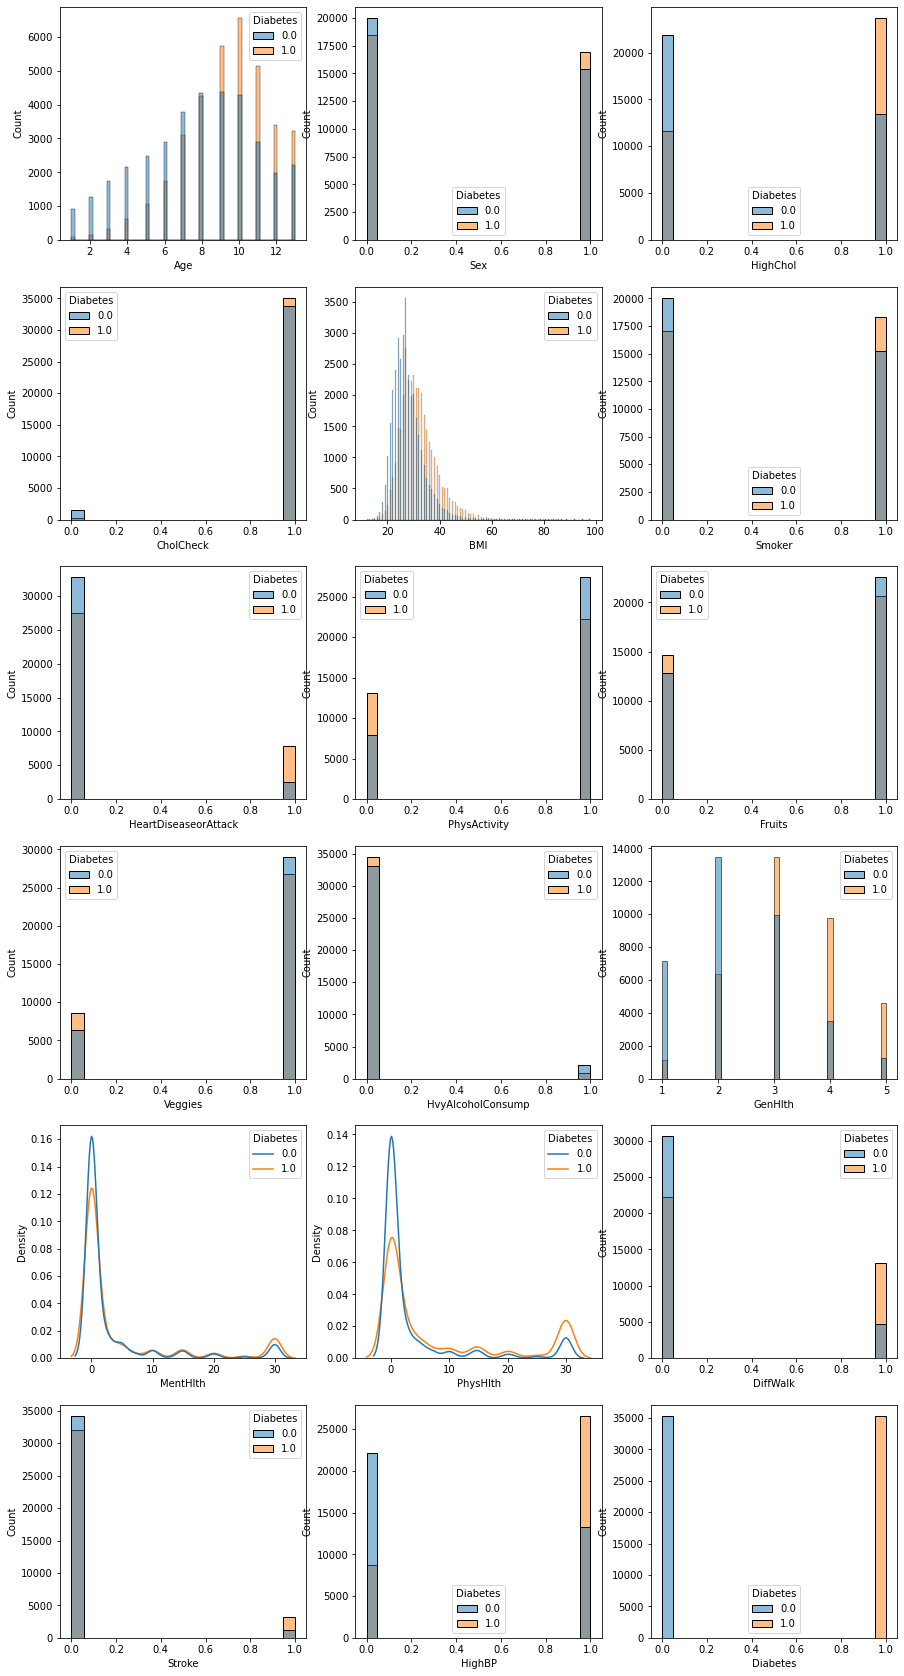

In [8]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
i = 0
for col in raw_df.columns:
    if col=='MentHlth' or col=='PhysHlth':
        sns.kdeplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i//3, i%3])
    else:
            sns.histplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i//3, i%3])
    i+=1
plt.show()

## 2. Pre-Processing

### 2-0. Baseline (Zero-R)
- 깔끔하게 균형을 맞춘 데이터셋이기에 사실 무의미하다.

In [9]:
print('- Total Instatnces')
print(len(raw_df.Diabetes), end='\n\n')
print('- Values and Counts of the Class') 
print(raw_df.Diabetes.value_counts(), end='\n\n')
print('- Zero R of the Dataset')
print(raw_df.Diabetes.value_counts().max()/len(raw_df.Diabetes))

- Total Instatnces
70692

- Values and Counts of the Class
0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

- Zero R of the Dataset
0.5


### 2-1. Naive Models and Results

- 간단하게 iteration만 조정하고 다른 hyperparameter 선택 없이 몇 가지 모델들을 돌려본다.
- 사용하고자 하는 모델은 다음과 같다.
1. Naive Bayes(Gaussian)
2. Decision Tree
3. Logistic Regressor
4. MLP
5. Random Forest
6. AdaBoost

In [10]:
X_df = raw_df.drop(columns=['Diabetes'])
y_df = raw_df['Diabetes']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=42, stratify=y_df)
print('                  X         y')
print('-'*34)
print('Train data |', X_train.shape, y_train.shape)
print('Test data  |', X_test.shape, y_test.shape)

                  X         y
----------------------------------
Train data | (53019, 17) (53019,)
Test data  | (17673, 17) (17673,)


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score

naive_dict = {'Gaussian NB':GaussianNB(), 
              'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),  
              'LogisticRegression':LogisticRegression(max_iter=1000, random_state=42), 
              'MLPClassifier':MLPClassifier(max_iter=1000, random_state=42),
              'RandomForestClassifier':RandomForestClassifier(random_state=42),
              'AdaBoostClassifier':AdaBoostClassifier(random_state=42)}

-----------------------------------
- Gaussian NB
Accuracy: 0.7216092344253947
f1 score: 0.7196900638103919


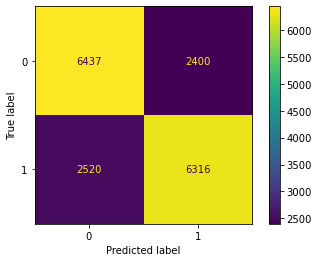

-----------------------------------
- DecisionTreeClassifier
Accuracy: 0.6615741526622532
f1 score: 0.6555318781316593


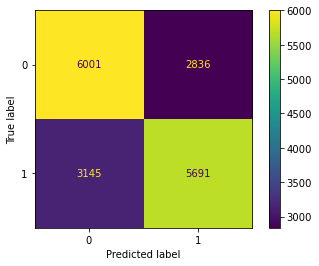

-----------------------------------
- LogisticRegression
Accuracy: 0.7457703842018899
f1 score: 0.7509285437108488


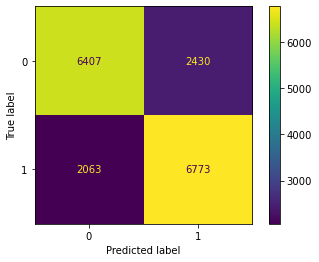

-----------------------------------
- MLPClassifier
Accuracy: 0.7495048944717931
f1 score: 0.762359761661925


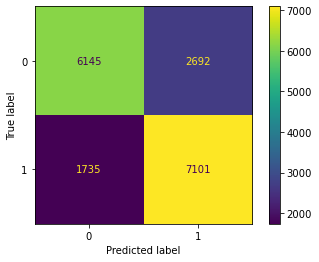

-----------------------------------
- RandomForestClassifier
Accuracy: 0.7235896565382222
f1 score: 0.7331038627547398


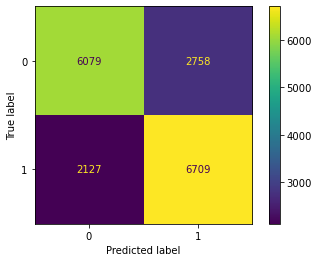

-----------------------------------
- AdaBoostClassifier
Accuracy: 0.7466757200248967
f1 score: 0.7527475561937372


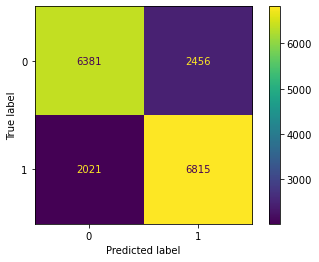

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

for model in naive_dict:
    naive_dict[model].fit(X_train, y_train)
    score = naive_dict[model].score(X_test, y_test)
    pred = naive_dict[model].predict(X_test)
    print('-'*35)
    print('-', model)
    print('Accuracy:', score)
    print('f1 score:', f1_score(y_test, pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
    plt.show()

- 생각보다 기본적인 점수가 나쁘지 않다.
- 이후 추가적인 모델에서는 baseline으로 Accuracy 0.75 이상, f1 score 0.75 이상을 목표로 한다.

### 2-2. Feature Selection

#### Tree 모델들의 feature importances

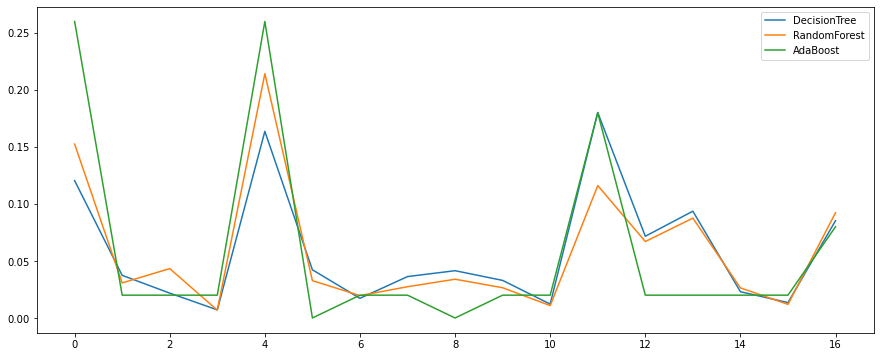

In [14]:
plt.figure(figsize=(15,6))
plt.plot(naive_dict['DecisionTreeClassifier'].feature_importances_, label='DecisionTree')
plt.plot(naive_dict['RandomForestClassifier'].feature_importances_, label='RandomForest')
plt.plot(naive_dict['AdaBoostClassifier'].feature_importances_, label='AdaBoost')
plt.legend()
plt.show()

- 전체적으로 비슷한 중요도가 높은 feature들이 유사하다

#### Tree 기반 모델들로부터  Recursive Feature Elimination 진행

In [15]:
from sklearn.feature_selection import RFE

dt = naive_dict['DecisionTreeClassifier']
rf = naive_dict['RandomForestClassifier']
ab = naive_dict['AdaBoostClassifier']
RFE_dt = RFE(dt, n_features_to_select=7)
RFE_rf = RFE(rf, n_features_to_select=7)
RFE_ab = RFE(ab, n_features_to_select=7)
RFE_dt.fit(X_train, y_train)
RFE_rf.fit(X_train, y_train)
RFE_ab.fit(X_train, y_train)

RFE(estimator=AdaBoostClassifier(random_state=42), n_features_to_select=7)

#### 7개씩을 고르도록 했을 때 ranking은 다음과 같다

In [16]:
dt_rank = RFE_dt.ranking_
rf_rank = RFE_rf.ranking_
ab_rank = RFE_ab.ranking_
rank = pd.DataFrame({'DecisionTree':dt_rank, 
                     'RandomForest':rf_rank,
                     'AdaBoostClassifier':ab_rank}).set_index(X_df.columns)
rank

,DecisionTree,RandomForest,AdaBoostClassifier
Age,1,1,1
Sex,4,4,9
HighChol,7,1,8
CholCheck,11,11,7
BMI,1,1,1
Smoker,3,3,10
HeartDiseaseorAttack,8,8,1
PhysActivity,2,7,5
Fruits,1,2,11
Veggies,5,6,4


- 모두 rank가 1인 feature는 무조건 포함하고, 하나라도 1인 feature들은 추가적으로 포함 여부를 확인하고자 한다

In [17]:
must = []
maybe = []
for i in rank.index:
    if rank.loc[i, :].sum()==3:
        must.append(i)
    elif 1 in rank.loc[i, :].values:
        maybe.append(i)

#### Correlation 확인
- must는 ranking이 모두 1이었던 변수들
- maybe는 ranking이 하나라도 1이었던 변수들

must :  ['Age', 'BMI', 'GenHlth', 'MentHlth', 'HighBP']
maybe : ['HighChol', 'HeartDiseaseorAttack', 'Fruits', 'PhysHlth', 'Stroke']


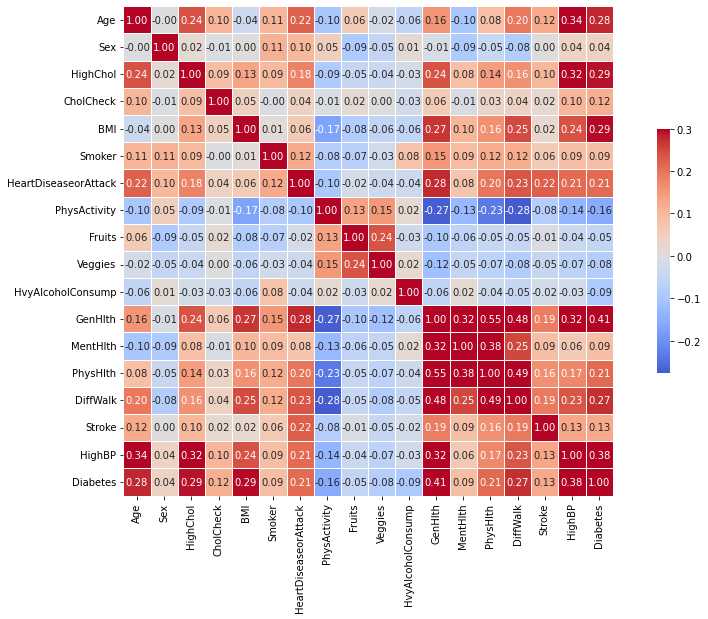

In [18]:
g = sns.heatmap(raw_df.corr(), vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
print('must : ', must)
print('maybe :', maybe)
g.figure.set_size_inches(16,9)
plt.show()

- 전체적으로 Diabetes와의 correlation이 높은 변수들과 feature importance가 높은 것들이 일치한다.
- must와 maybe에 해당하는 feature들만 골라서 다시 correlation을 확인해본다.

must :  ['Age', 'BMI', 'GenHlth', 'MentHlth', 'HighBP']
maybe : ['HighChol', 'HeartDiseaseorAttack', 'Fruits', 'PhysHlth', 'Stroke']


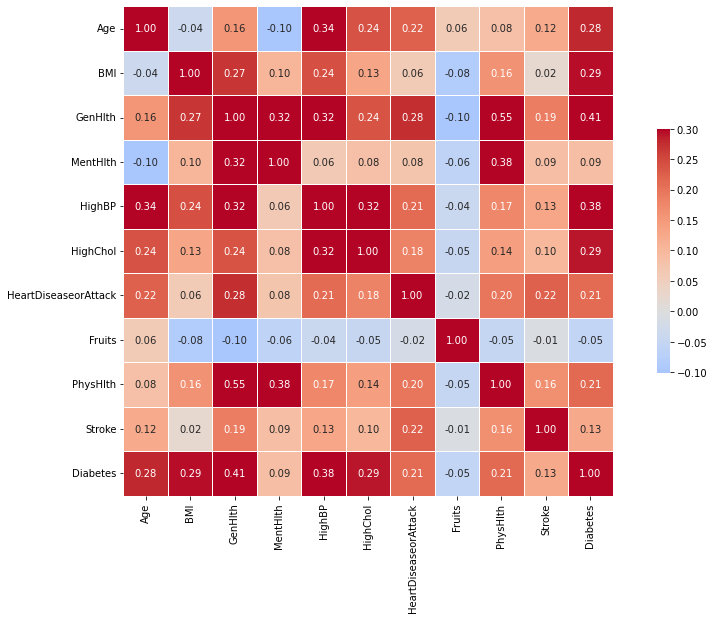

In [19]:
reduced_df = raw_df[must+maybe+['Diabetes']]
g = sns.heatmap(reduced_df.corr(), vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
print('must : ', must)
print('maybe :', maybe)
g.figure.set_size_inches(16,9)
plt.show()

- must 중 MentHlth의 Correlation은 비교적 낮게 나타나고 있다.
- maybe 중 Fruit의 Correlation이 비교적 낮게 나타나고 있다.

#### 각 feature 별 Diabetes의 분포를 다시 한 번 시각화

- must 해당 feature

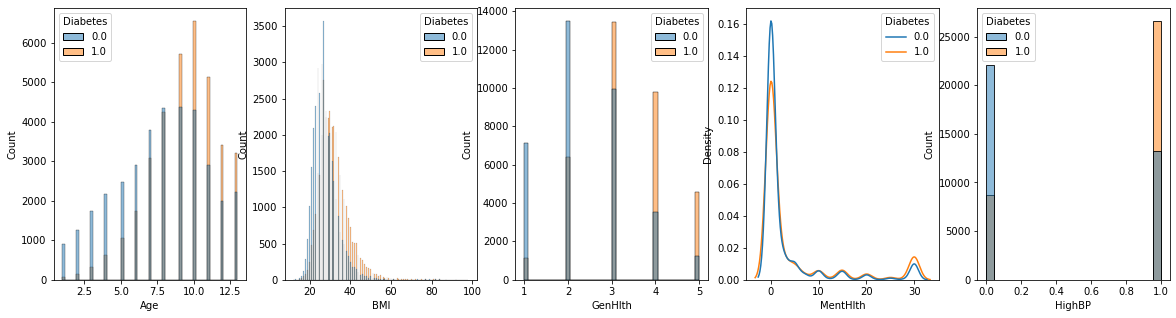

In [20]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))
i = 0
for col in must:
    if col=='MentHlth' or col=='PhysHlth':
        sns.kdeplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i])
    else:
            sns.histplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i])
    i+=1
plt.show()

- maybe 해당 feature

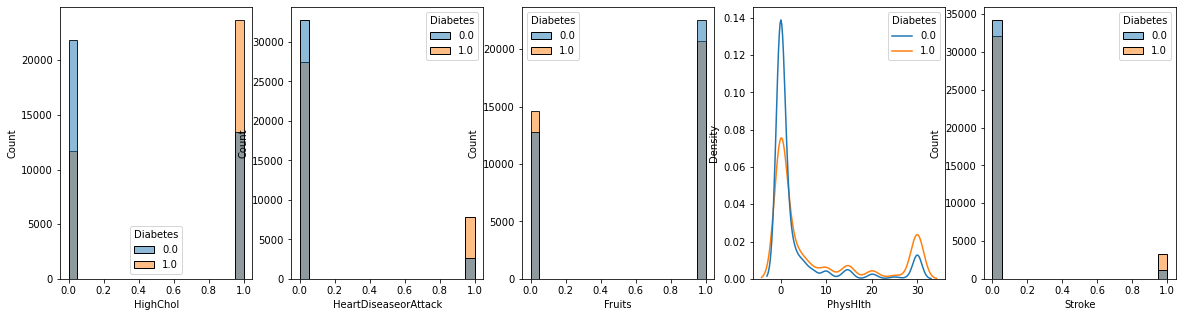

In [21]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))
i = 0
for col in maybe:
    if col=='MentHlth' or col=='PhysHlth':
        sns.kdeplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i])
    else:
            sns.histplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i])
    i+=1
plt.show()

- Must의 경우 MentHlth의 포함 여부가 조금 헷갈리지만, RFE에서 모두 선택되었으므로 포함하도록 한다.
- Maybe의 경우 Fruit를 제외하고 다른 feature들은 포함하고자 한다.

In [22]:
selected_features = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'HighBP', 
                     'HighChol', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke']

### 2-3. Scaling

- 이미 전체적으로 전처리가 깔끔하게 되어 있는 데이터지만, MLP 사용 전에 0~1 범위로만 간단히 스케일링을 진행하려 한다.
- 사이킷런의 MinMaxScaler와 동일한 방식이다.

In [23]:
def scaling(DataFrame):
    df = DataFrame.copy()
    for col in df.columns:
        df[col] = (df[col] - df[col].min())
        df[col] = df[col] / df[col].max()
    return df

In [24]:
scaled_df = scaling(raw_df)

In [25]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,0.632005,0.237679,0.0,0.500000,0.666667,0.833333,1.0
Sex,70692.0,0.456997,0.498151,0.0,0.000000,0.000000,1.000000,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.000000,1.000000,1.000000,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.000000,1.000000,1.000000,1.0
BMI,70692.0,0.207639,0.082720,0.0,0.151163,0.197674,0.244186,1.0
Smoker,70692.0,0.475273,0.499392,0.0,0.000000,0.000000,1.000000,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.000000,0.000000,0.000000,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.000000,1.000000,1.000000,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.000000,1.000000,1.000000,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.000000,1.000000,1.000000,1.0


In [26]:
X_df = scaled_df.drop(columns=['Diabetes'])
y_df = raw_df['Diabetes']

## 3. Modeling

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2,
                                                    random_state=42, stratify=y_df)
sel_X_train, sel_X_test = X_train[selected_features], X_test[selected_features]
print('                      X         y')
print('-'*38)
print('Train data     |', X_train.shape, y_train.shape)
print('Test data      |', X_test.shape, y_test.shape)
print('Selected Train |', sel_X_train.shape,'', y_train.shape)
print('Selected Test  |', sel_X_test.shape,'', y_test.shape)

                      X         y
--------------------------------------
Train data     | (56553, 17) (56553,)
Test data      | (14139, 17) (14139,)
Selected Train | (56553, 9)  (56553,)
Selected Test  | (14139, 9)  (14139,)


### 3-0. 5-fold Cross Validation

In [28]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

In [29]:
import time

def skfCV(X, y, model, fold, params):
    start = time.time()
    result = []
    i, tot = 1, len(params)
    for param in params:
        iter_start = time.time()
        print(f'- Trying [{i}/{tot}]... {param}')
        print('', '-'*80)
        acc = []
        f1 = []
        for train_idx, val_idx in fold.split(X, y):
            X_train_cv, X_val_cv = X.iloc[train_idx, :], X.iloc[val_idx, :]
            y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
            temp = copy.deepcopy(model).set_params(**param)
            temp.fit(X_train_cv, y_train_cv)
            acc.append(temp.score(X_val_cv, y_val_cv))
            f1.append(f1_score(y_val_cv, temp.predict(X_val_cv)))
        print(' Accuracy:', np.mean(acc),'\n f1 score:', np.mean(f1), end=' ')
        tot_spend = time.time() - start
        spend = time.time() - iter_start
        print(f' ... {int(spend/60)}min {int(spend%60)}sec for this parameter (total {int(tot_spend/60)}min {int(tot_spend%60)}sec)')
        print()
        result.append((np.mean(acc), np.mean(f1)))
        i+=1
    return result

### 3-1. SVM

- Naive Bayes Classifier의 경우 시도해 볼 경우가 많이 없어 SVM으로 대체

#### Linear Support Vector Classifier

In [30]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7470118113020723

In [31]:
penalty = [0.1, 1, 10]
kernel = ['linear', 'rbf']
svc_params = [{'C':c, 'kernel':k} for c in penalty for k in kernel]
svc_params = svc_params + [{'C':c, 'kernel':'poly', 'degree':d} for c in penalty for d in [2,3,4]]

#### 3-1-1. Using All Features

In [32]:
svc = SVC(random_state=42)
svc_all = skfCV(X_train, y_train, svc, skf, svc_params)

- Trying [1/15]... {'C': 0.1, 'kernel': 'linear'}
 --------------------------------------------------------------------------------
 Accuracy: 0.747069073000071 
 f1 score: 0.7579864101668724  ... 3min 49sec for this parameter (total 3min 49sec)

- Trying [2/15]... {'C': 0.1, 'kernel': 'rbf'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7405265470472668 
 f1 score: 0.7563953701001812  ... 8min 21sec for this parameter (total 12min 10sec)

- Trying [3/15]... {'C': 1, 'kernel': 'linear'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7481653900442448 
 f1 score: 0.7588154001297729  ... 3min 54sec for this parameter (total 16min 5sec)

- Trying [4/15]... {'C': 1, 'kernel': 'rbf'}
 --------------------------------------------------------------------------------
 Accuracy: 0.745318531814253 
 f1 score: 0.7588196449999743  ... 8min 15sec for this parameter (total 24min 20sec)

- Trying [5/15]...

#### 3-1-2. Using Selected Features

In [33]:
svc = SVC(random_state=42)
svc_sel = skfCV(sel_X_train, y_train, svc, skf, svc_params)

- Trying [1/15]... {'C': 0.1, 'kernel': 'linear'}
 --------------------------------------------------------------------------------
 Accuracy: 0.742984442505324 
 f1 score: 0.7540910083702694  ... 3min 30sec for this parameter (total 3min 30sec)

- Trying [2/15]... {'C': 0.1, 'kernel': 'rbf'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7354693212345971 
 f1 score: 0.7518877496974256  ... 7min 41sec for this parameter (total 11min 11sec)

- Trying [3/15]... {'C': 1, 'kernel': 'linear'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7441161264814162 
 f1 score: 0.75493359306194  ... 3min 30sec for this parameter (total 14min 42sec)

- Trying [4/15]... {'C': 1, 'kernel': 'rbf'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7396070333949543 
 f1 score: 0.7539693140561342  ... 7min 42sec for this parameter (total 22min 25sec)

- Trying [5/15]...

### 3-2. Decision Tree

In [34]:
# Accuracy: 0.6615741526622532
# f1 score: 0.6555318781316593
max_depth = [2, 5, 10, 30, 50, 100]
min_samples_split = [2, 5, 10, 20, 50, 100]
min_samples_leaf = [2, 5, 10, 20, 50, 100]
dt_params = [{'max_depth':md, 'min_samples_split':mss, 'min_samples_leaf':msl}
            for md in max_depth for mss in min_samples_split for msl in min_samples_leaf]

#### 3-2-1. Using All Features

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt_all = skfCV(X_train, y_train, dt, skf, dt_params)

- Trying [1/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [2/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [3/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [4/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 20}
 -------------------------------------------------------------------------

 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 4sec)

- Trying [31/216]... {'max_depth': 2, 'min_samples_split': 100, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 4sec)

- Trying [32/216]... {'max_depth': 2, 'min_samples_split': 100, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 4sec)

- Trying [33/216]... {'max_depth': 2, 'min_samples_split': 100, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 4sec)

- Trying [34/216]... {'max_depth': 2

 Accuracy: 0.7336479899030238 
 f1 score: 0.7470892591996832  ... 0min 0sec for this parameter (total 0min 10sec)

- Trying [60/216]... {'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 100}
 --------------------------------------------------------------------------------
 Accuracy: 0.7336479883396372 
 f1 score: 0.7470731137200717  ... 0min 0sec for this parameter (total 0min 10sec)

- Trying [61/216]... {'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7336479899030238 
 f1 score: 0.7470892591996832  ... 0min 0sec for this parameter (total 0min 11sec)

- Trying [62/216]... {'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7336479899030238 
 f1 score: 0.7470892591996832  ... 0min 0sec for this parameter (total 0min 11sec)

- Trying [63/216]... {'max_depth':

 Accuracy: 0.737043098113219 
 f1 score: 0.7454100063883039  ... 0min 0sec for this parameter (total 0min 19sec)

- Trying [89/216]... {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 50}
 --------------------------------------------------------------------------------
 Accuracy: 0.7385991696384693 
 f1 score: 0.7481137638124206  ... 0min 0sec for this parameter (total 0min 20sec)

- Trying [90/216]... {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 100}
 --------------------------------------------------------------------------------
 Accuracy: 0.740119788245537 
 f1 score: 0.7485798818001608  ... 0min 0sec for this parameter (total 0min 20sec)

- Trying [91/216]... {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7373966736292089 
 f1 score: 0.7468545673732044  ... 0min 0sec for this parameter (total 0min 21sec)

- Trying [92/216]... {'max_depth

 Accuracy: 0.7126589071098992 
 f1 score: 0.7127481591647309  ... 0min 0sec for this parameter (total 0min 31sec)

- Trying [118/216]... {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 20}
 --------------------------------------------------------------------------------
 Accuracy: 0.7283078942972425 
 f1 score: 0.7332527655619169  ... 0min 0sec for this parameter (total 0min 32sec)

- Trying [119/216]... {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 50}
 --------------------------------------------------------------------------------
 Accuracy: 0.7375558779779876 
 f1 score: 0.7467205531718153  ... 0min 0sec for this parameter (total 0min 32sec)

- Trying [120/216]... {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 100}
 --------------------------------------------------------------------------------
 Accuracy: 0.7393594648715236 
 f1 score: 0.7476437219391194  ... 0min 0sec for this parameter (total 0min 33sec)

- Trying [121/216]... {'max_d

 Accuracy: 0.69168733424682 
 f1 score: 0.6857879034572967  ... 0min 0sec for this parameter (total 0min 44sec)

- Trying [147/216]... {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7126589071098992 
 f1 score: 0.7127481591647309  ... 0min 0sec for this parameter (total 0min 45sec)

- Trying [148/216]... {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 20}
 --------------------------------------------------------------------------------
 Accuracy: 0.7283078942972425 
 f1 score: 0.7332527655619169  ... 0min 0sec for this parameter (total 0min 45sec)

- Trying [149/216]... {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 50}
 --------------------------------------------------------------------------------
 Accuracy: 0.7375558779779876 
 f1 score: 0.7467205531718153  ... 0min 0sec for this parameter (total 0min 46sec)

- Trying [150/216]... {'max_dept

 Accuracy: 0.7329583613081825 
 f1 score: 0.7406267294029989  ... 0min 0sec for this parameter (total 0min 58sec)

- Trying [176/216]... {'max_depth': 50, 'min_samples_split': 100, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7335772919970787 
 f1 score: 0.7416576974570379  ... 0min 0sec for this parameter (total 0min 58sec)

- Trying [177/216]... {'max_depth': 50, 'min_samples_split': 100, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7349565116654828 
 f1 score: 0.742670306987648  ... 0min 0sec for this parameter (total 0min 59sec)

- Trying [178/216]... {'max_depth': 50, 'min_samples_split': 100, 'min_samples_leaf': 20}
 --------------------------------------------------------------------------------
 Accuracy: 0.7359644066897 
 f1 score: 0.7440142932154428  ... 0min 0sec for this parameter (total 0min 59sec)

- Trying [179/216]... {'max_d

 Accuracy: 0.7393594648715236 
 f1 score: 0.7476437219391194  ... 0min 0sec for this parameter (total 1min 11sec)

- Trying [205/216]... {'max_depth': 100, 'min_samples_split': 50, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7229323582803716 
 f1 score: 0.727601577011466  ... 0min 0sec for this parameter (total 1min 12sec)

- Trying [206/216]... {'max_depth': 100, 'min_samples_split': 50, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7239225542047635 
 f1 score: 0.7293000821951375  ... 0min 0sec for this parameter (total 1min 12sec)

- Trying [207/216]... {'max_depth': 100, 'min_samples_split': 50, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7263273820676898 
 f1 score: 0.732061224619577  ... 0min 0sec for this parameter (total 1min 12sec)

- Trying [208/216]... {'max_

#### 3-2-2. Using Selected Features

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt_sel = skfCV(sel_X_train, y_train, dt, skf, dt_params)

- Trying [1/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [2/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [3/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [4/216]... {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 20}
 -------------------------------------------------------------------------

 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 3sec)

- Trying [31/216]... {'max_depth': 2, 'min_samples_split': 100, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 3sec)

- Trying [32/216]... {'max_depth': 2, 'min_samples_split': 100, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 3sec)

- Trying [33/216]... {'max_depth': 2, 'min_samples_split': 100, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7002456299240327 
 f1 score: 0.6701360185613117  ... 0min 0sec for this parameter (total 0min 4sec)

- Trying [34/216]... {'max_depth': 2

 Accuracy: 0.733913216878228 
 f1 score: 0.7475927396372882  ... 0min 0sec for this parameter (total 0min 8sec)

- Trying [61/216]... {'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7339132184416146 
 f1 score: 0.7476088851168996  ... 0min 0sec for this parameter (total 0min 9sec)

- Trying [62/216]... {'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7339132184416146 
 f1 score: 0.7476088851168996  ... 0min 0sec for this parameter (total 0min 9sec)

- Trying [63/216]... {'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7339132184416146 
 f1 score: 0.7476088851168996  ... 0min 0sec for this parameter (total 0min 9sec)

- Trying [64/216]... {'max_depth': 5, 'm

 Accuracy: 0.7393771858587616 
 f1 score: 0.7487374043912312  ... 0min 0sec for this parameter (total 0min 15sec)

- Trying [90/216]... {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 100}
 --------------------------------------------------------------------------------
 Accuracy: 0.7385637761289782 
 f1 score: 0.7469563519601478  ... 0min 0sec for this parameter (total 0min 16sec)

- Trying [91/216]... {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7367247800920851 
 f1 score: 0.7443418165931618  ... 0min 0sec for this parameter (total 0min 16sec)

- Trying [92/216]... {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7359467654351792 
 f1 score: 0.7434711151571622  ... 0min 0sec for this parameter (total 0min 16sec)

- Trying [93/216]... {'max_dept

 Accuracy: 0.7328169545525858 
 f1 score: 0.7395468739862998  ... 0min 0sec for this parameter (total 0min 24sec)

- Trying [119/216]... {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 50}
 --------------------------------------------------------------------------------
 Accuracy: 0.7395363292354624 
 f1 score: 0.7494788241651177  ... 0min 0sec for this parameter (total 0min 24sec)

- Trying [120/216]... {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 100}
 --------------------------------------------------------------------------------
 Accuracy: 0.7386345053026556 
 f1 score: 0.7470391450571308  ... 0min 0sec for this parameter (total 0min 24sec)

- Trying [121/216]... {'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.6931551119498159 
 f1 score: 0.6848673425110141  ... 0min 0sec for this parameter (total 0min 25sec)

- Trying [122/216]... {'max_d

 Accuracy: 0.7189185538892721 
 f1 score: 0.7209562352945469  ... 0min 0sec for this parameter (total 0min 33sec)

- Trying [148/216]... {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 20}
 --------------------------------------------------------------------------------
 Accuracy: 0.7328169545525858 
 f1 score: 0.7395468739862998  ... 0min 0sec for this parameter (total 0min 33sec)

- Trying [149/216]... {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 50}
 --------------------------------------------------------------------------------
 Accuracy: 0.7395363292354624 
 f1 score: 0.7494788241651177  ... 0min 0sec for this parameter (total 0min 34sec)

- Trying [150/216]... {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 100}
 --------------------------------------------------------------------------------
 Accuracy: 0.7386345053026556 
 f1 score: 0.7470391450571308  ... 0min 0sec for this parameter (total 0min 34sec)

- Trying [151/216]... {'max_d

 Accuracy: 0.7344260717855541 
 f1 score: 0.7420863224872006  ... 0min 0sec for this parameter (total 0min 42sec)

- Trying [177/216]... {'max_depth': 50, 'min_samples_split': 100, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7355754110866468 
 f1 score: 0.743197395286091  ... 0min 0sec for this parameter (total 0min 42sec)

- Trying [178/216]... {'max_depth': 50, 'min_samples_split': 100, 'min_samples_leaf': 20}
 --------------------------------------------------------------------------------
 Accuracy: 0.7378388134333369 
 f1 score: 0.7465435585290431  ... 0min 0sec for this parameter (total 0min 43sec)

- Trying [179/216]... {'max_depth': 50, 'min_samples_split': 100, 'min_samples_leaf': 50}
 --------------------------------------------------------------------------------
 Accuracy: 0.7395363292354624 
 f1 score: 0.7494788241651177  ... 0min 0sec for this parameter (total 0min 43sec)

- Trying [180/216]... {'m

 Accuracy: 0.7236574085256631 
 f1 score: 0.7292547324986366  ... 0min 0sec for this parameter (total 0min 51sec)

- Trying [206/216]... {'max_depth': 100, 'min_samples_split': 50, 'min_samples_leaf': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7260976345882403 
 f1 score: 0.7323018092964214  ... 0min 0sec for this parameter (total 0min 52sec)

- Trying [207/216]... {'max_depth': 100, 'min_samples_split': 50, 'min_samples_leaf': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7286615276585369 
 f1 score: 0.7351409863264335  ... 0min 0sec for this parameter (total 0min 52sec)

- Trying [208/216]... {'max_depth': 100, 'min_samples_split': 50, 'min_samples_leaf': 20}
 --------------------------------------------------------------------------------
 Accuracy: 0.7332413749328623 
 f1 score: 0.740680392536908  ... 0min 0sec for this parameter (total 0min 52sec)

- Trying [209/216]... {'ma

### 3-3. Logistic Regression

In [37]:
# Accuracy: 0.7457703842018899
# f1 score: 0.7509285437108488
penalty = ['l1', 'l2']
reg = [1.0, 0.5, 0.1]
lr_params = [{'C':c} for c in reg]
lr_params = lr_params + [{'solver':'liblinear', 'penalty':pen, 'C':c} for pen in penalty for c in reg]

#### 3-3-1. Using All Features

In [38]:
lr = LogisticRegression(max_iter=2000, random_state=42)
lr_all = skfCV(X_train, y_train, lr, skf, lr_params)

- Trying [1/9]... {'C': 1.0}
 --------------------------------------------------------------------------------
 Accuracy: 0.7480592908118753 
 f1 score: 0.7532020476054541  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [2/9]... {'C': 0.5}
 --------------------------------------------------------------------------------
 Accuracy: 0.747634909516264 
 f1 score: 0.7528445173483582  ... 0min 0sec for this parameter (total 0min 1sec)

- Trying [3/9]... {'C': 0.1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7468392051398522 
 f1 score: 0.752313575557217  ... 0min 0sec for this parameter (total 0min 1sec)

- Trying [4/9]... {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
 --------------------------------------------------------------------------------
 Accuracy: 0.7478117269786044 
 f1 score: 0.752952732818952  ... 0min 3sec for this parameter (total 0min 5sec)

- Trying [5/9]... {'solver': 'liblinear', 'penalty': 'l1', 'C':

#### 3-3-2. Using Selected Features

In [39]:
lr = LogisticRegression(max_iter=2000, random_state=42)
lr_sel = skfCV(sel_X_train, y_train, lr, skf, lr_params)

- Trying [1/9]... {'C': 1.0}
 --------------------------------------------------------------------------------
 Accuracy: 0.7451770375090062 
 f1 score: 0.7503508787276317  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [2/9]... {'C': 0.5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7450886170524361 
 f1 score: 0.7502778601114612  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [3/9]... {'C': 0.1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7434795310872002 
 f1 score: 0.7489405601252643  ... 0min 0sec for this parameter (total 0min 0sec)

- Trying [4/9]... {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
 --------------------------------------------------------------------------------
 Accuracy: 0.7454953367695007 
 f1 score: 0.7507395904876782  ... 0min 0sec for this parameter (total 0min 1sec)

- Trying [5/9]... {'solver': 'liblinear', 'penalty': 'l1', '

### 3-4. MLP

In [40]:
# Accuracy: 0.7495048944717931
# f1 score: 0.762359761661925

In [41]:
hidden_layer_sizes = [(32), (64), (128), (256), 
                      (32, 32), (64, 64), (128, 128), (256, 256), 
                      (32, 32, 32), (64, 64, 64), (128, 128, 128), 
                      (32, 32, 32, 32), (64, 64, 64, 64), (128, 128, 128, 128)]
activation = ['logistic', 'relu']
mlp_params =[{'hidden_layer_sizes':hidden, 'activation':act}
             for hidden in hidden_layer_sizes for act in activation]

#### 3-4-1. Using All Features

In [42]:
mlp = MLPClassifier(max_iter=3000, random_state=42)
mlp_all = skfCV(X_train, y_train, mlp, skf, mlp_params)

- Trying [1/28]... {'hidden_layer_sizes': 32, 'activation': 'logistic'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7503226071723018 
 f1 score: 0.7618166064494577  ... 0min 22sec for this parameter (total 0min 22sec)

- Trying [2/28]... {'hidden_layer_sizes': 32, 'activation': 'relu'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7507647235256307 
 f1 score: 0.7590253706838934  ... 0min 26sec for this parameter (total 0min 48sec)

- Trying [3/28]... {'hidden_layer_sizes': 64, 'activation': 'logistic'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7505347900031746 
 f1 score: 0.7614248111592232  ... 1min 4sec for this parameter (total 1min 52sec)

- Trying [4/28]... {'hidden_layer_sizes': 64, 'activation': 'relu'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7506585977156889 
 f1 score: 0.7

#### 3-4-2. Using Selected Features

In [43]:
mlp = MLPClassifier(max_iter=3000, random_state=42)
mlp_sel = skfCV(sel_X_train, y_train, mlp, skf, mlp_params)

- Trying [1/28]... {'hidden_layer_sizes': 32, 'activation': 'logistic'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7461672631377436 
 f1 score: 0.7569776014585614  ... 0min 14sec for this parameter (total 0min 14sec)

- Trying [2/28]... {'hidden_layer_sizes': 32, 'activation': 'relu'}
 --------------------------------------------------------------------------------
 Accuracy: 0.747617232303851 
 f1 score: 0.7578756154232342  ... 0min 13sec for this parameter (total 0min 28sec)

- Trying [3/28]... {'hidden_layer_sizes': 64, 'activation': 'logistic'}
 --------------------------------------------------------------------------------
 Accuracy: 0.746644669817047 
 f1 score: 0.7599662957086467  ... 0min 40sec for this parameter (total 1min 8sec)

- Trying [4/28]... {'hidden_layer_sizes': 64, 'activation': 'relu'}
 --------------------------------------------------------------------------------
 Accuracy: 0.7476702358001307 
 f1 score: 0.759

### 3-5. Random Forest

In [44]:
# Accuracy: 0.7235896565382222
# f1 score: 0.7331038627547398
n_estimators = [100, 200, 500]
max_depth = [2, 5, 10, 50, 100]
min_samples_split = [2, 5, 10, 20, 50, 100]
rf_params = [{'n_estimators':est, 'max_depth':md, 'min_samples_split':mss}
            for est in n_estimators for md in max_depth for mss in min_samples_split]

#### 3-5-1. Using All Features

In [45]:
rf = RandomForestClassifier(random_state=42)
rf_all = skfCV(X_train, y_train, rf, skf, rf_params)

- Trying [1/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7326224082860742 
 f1 score: 0.7381876444232569  ... 0min 3sec for this parameter (total 0min 3sec)

- Trying [2/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7326224082860742 
 f1 score: 0.7381876444232569  ... 0min 3sec for this parameter (total 0min 7sec)

- Trying [3/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7326224082860742 
 f1 score: 0.7381876444232569  ... 0min 3sec for this parameter (total 0min 11sec)

- Trying [4/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 20}
 --------------------------------------------------------------------------------
 Ac

 Accuracy: 0.749473833637373 
 f1 score: 0.7597897052030672  ... 0min 9sec for this parameter (total 4min 18sec)

- Trying [31/90]... {'n_estimators': 200, 'max_depth': 2, 'min_samples_split': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7332589724125581 
 f1 score: 0.7378829613515457  ... 0min 7sec for this parameter (total 4min 25sec)

- Trying [32/90]... {'n_estimators': 200, 'max_depth': 2, 'min_samples_split': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7332589724125581 
 f1 score: 0.7378829613515457  ... 0min 7sec for this parameter (total 4min 32sec)

- Trying [33/90]... {'n_estimators': 200, 'max_depth': 2, 'min_samples_split': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7332589724125581 
 f1 score: 0.7378829613515457  ... 0min 7sec for this parameter (total 4min 40sec)

- Trying [34/90]... {'n_estimators': 200, 'max_d

 Accuracy: 0.7494561579883467 
 f1 score: 0.7600257593350657  ... 0min 19sec for this parameter (total 12min 52sec)

- Trying [61/90]... {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7354692993471843 
 f1 score: 0.7421526056349643  ... 0min 17sec for this parameter (total 13min 10sec)

- Trying [62/90]... {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7354692993471843 
 f1 score: 0.7421526056349643  ... 0min 18sec for this parameter (total 13min 28sec)

- Trying [63/90]... {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7354692993471843 
 f1 score: 0.7421526056349643  ... 0min 17sec for this parameter (total 13min 46sec)

- Trying [64/90]... {'n_estimators': 50

 Accuracy: 0.7494561548615735 
 f1 score: 0.7601356985803172  ... 0min 48sec for this parameter (total 34min 17sec)



#### 3-5-2. Using Selected Features

In [46]:
rf = RandomForestClassifier(random_state=42)
rf_sel = skfCV(sel_X_train, y_train, rf, skf, rf_params)

- Trying [1/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7330467786379791 
 f1 score: 0.7419560595565518  ... 0min 3sec for this parameter (total 0min 3sec)

- Trying [2/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7330467786379791 
 f1 score: 0.7419560595565518  ... 0min 3sec for this parameter (total 0min 7sec)

- Trying [3/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7330467786379791 
 f1 score: 0.7419560595565518  ... 0min 3sec for this parameter (total 0min 11sec)

- Trying [4/90]... {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 20}
 --------------------------------------------------------------------------------
 Ac

 Accuracy: 0.7455660127880335 
 f1 score: 0.7558858841008342  ... 0min 9sec for this parameter (total 4min 0sec)

- Trying [31/90]... {'n_estimators': 200, 'max_depth': 2, 'min_samples_split': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7324102020044024 
 f1 score: 0.7363728961501773  ... 0min 7sec for this parameter (total 4min 8sec)

- Trying [32/90]... {'n_estimators': 200, 'max_depth': 2, 'min_samples_split': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7324102020044024 
 f1 score: 0.7363728961501773  ... 0min 7sec for this parameter (total 4min 15sec)

- Trying [33/90]... {'n_estimators': 200, 'max_depth': 2, 'min_samples_split': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7324102020044024 
 f1 score: 0.7363728961501773  ... 0min 7sec for this parameter (total 4min 23sec)

- Trying [34/90]... {'n_estimators': 200, 'max_de

 Accuracy: 0.7457428365039205 
 f1 score: 0.7561219687292909  ... 0min 17sec for this parameter (total 12min 0sec)

- Trying [61/90]... {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2}
 --------------------------------------------------------------------------------
 Accuracy: 0.7308718389592973 
 f1 score: 0.7327986936952808  ... 0min 18sec for this parameter (total 12min 18sec)

- Trying [62/90]... {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 5}
 --------------------------------------------------------------------------------
 Accuracy: 0.7308718389592973 
 f1 score: 0.7327986936952808  ... 0min 17sec for this parameter (total 12min 36sec)

- Trying [63/90]... {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.7308718389592973 
 f1 score: 0.7327986936952808  ... 0min 17sec for this parameter (total 12min 54sec)

- Trying [64/90]... {'n_estimators': 500

 Accuracy: 0.7461318602479328 
 f1 score: 0.7565363214488723  ... 0min 44sec for this parameter (total 31min 48sec)



### 3-6. AdaBoost

In [47]:
# Accuracy: 0.7466757200248967
# f1 score: 0.7527475561937372
n_estimators = [50, 100, 200, 500]
learning_rate = [0.1, 1, 10]
ab_params = [{'n_estimators':est, 'learning_rate':lr}
            for est in n_estimators for lr in learning_rate]

#### 3-6-1. Using All Features

In [48]:
ab = AdaBoostClassifier(random_state=42)
ab_all = skfCV(X_train, y_train, ab, skf, ab_params)

- Trying [1/12]... {'n_estimators': 50, 'learning_rate': 0.1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7423654461541901 
 f1 score: 0.7482805333867685  ... 0min 4sec for this parameter (total 0min 4sec)

- Trying [2/12]... {'n_estimators': 50, 'learning_rate': 1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7484128975955974 
 f1 score: 0.7540612389612417  ... 0min 4sec for this parameter (total 0min 9sec)

- Trying [3/12]... {'n_estimators': 50, 'learning_rate': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.3158454032642418 
 f1 score: 0.2577803555570165  ... 0min 4sec for this parameter (total 0min 13sec)

- Trying [4/12]... {'n_estimators': 100, 'learning_rate': 0.1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7479708093832275 
 f1 score: 0.753918489728013  ... 0min 8sec for this

#### 3-6-2. Using Selected Features

In [49]:
ab = AdaBoostClassifier(random_state=42)
ab_sel = skfCV(sel_X_train, y_train, ab, skf, ab_params)

- Trying [1/12]... {'n_estimators': 50, 'learning_rate': 0.1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7421178979547854 
 f1 score: 0.7481522196721738  ... 0min 3sec for this parameter (total 0min 3sec)

- Trying [2/12]... {'n_estimators': 50, 'learning_rate': 1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7458135719311444 
 f1 score: 0.7510445164808733  ... 0min 3sec for this parameter (total 0min 7sec)

- Trying [3/12]... {'n_estimators': 50, 'learning_rate': 10}
 --------------------------------------------------------------------------------
 Accuracy: 0.3158454032642418 
 f1 score: 0.2577803555570165  ... 0min 3sec for this parameter (total 0min 11sec)

- Trying [4/12]... {'n_estimators': 100, 'learning_rate': 0.1}
 --------------------------------------------------------------------------------
 Accuracy: 0.7454952476564639 
 f1 score: 0.7513667147313555  ... 0min 7sec for thi

### 3-7. Select the Optimal Parameters

#### CrossValidation 결과를 바탕으로 각 모델 별 optimal prameter 선택
- Accuracy, F1-Score 및 둘의 평균을 확인
- 확인한 결과를 바탕으로 optimal parameter 선택

In [50]:
def result_analysis(params, result):
    n = len(params)
    best_acc = [0, []]
    best_f1 = [0, []]
    best_avg = [0, []]
    for i in range(n):
        acc = result[i][0]
        f1 = result[i][1]
        avg = (acc+f1)/2
        
        if acc > best_acc[0]:
            best_acc[0], best_acc[1] = acc, [params[i]]
        elif acc == best_acc[0]:
            best_acc[1].append(params[i])
        
        if f1 > best_f1[0]:
            best_f1[0], best_f1[1] = f1, [params[i]]
        elif f1 == best_f1[0]:
            best_f1[1].append(params[i])
        
        if avg > best_avg[0]:
            best_avg[0], best_avg[1] = avg, [params[i]]
        elif avg == best_avg[0]:
            best_avg[1].append(params[i])
        
    return {'best_acc':best_acc, 'best_f1':best_f1, 'best_avg':best_avg}

In [51]:
# svc
svc_all_result = result_analysis(svc_params, svc_all)
svc_sel_result = result_analysis(svc_params, svc_sel)
# dt
dt_all_result = result_analysis(dt_params, dt_all)
dt_sel_result = result_analysis(dt_params, dt_sel)
# lr
lr_all_result = result_analysis(lr_params, lr_all)
lr_sel_result = result_analysis(lr_params, lr_sel)
# mlp
mlp_all_result = result_analysis(mlp_params, mlp_all)
mlp_sel_result = result_analysis(mlp_params, mlp_sel)
# rf
rf_all_result = result_analysis(rf_params, rf_all)
rf_sel_result = result_analysis(rf_params, rf_sel)
# ab
ab_all_result = result_analysis(ab_params, ab_all)
ab_sel_result = result_analysis(ab_params, ab_sel)

In [52]:
def result_print(result, title):
    acc = result['best_acc']
    f1 = result['best_f1']
    avg = result['best_avg']
    print(title, '='*(80 - len(title)))
    print(f'- best accuracy: {acc[0]}')
    for params in acc[1]:
        print('    ', params)        
    print(f'- best f1-score: {f1[0]}')
    for params in f1[1]:
        print('    ', params)        
    print(f'- best average : {avg[0]}')
    for params in avg[1]:
        print('    ', params)
    print('='*81, end='\n\n')

In [53]:
result_print(svc_all_result, 'SVC CV results')
result_print(svc_sel_result, 'SVC CV results(using selected features)')
result_print(dt_all_result, 'DecisionTree CV results')
result_print(dt_sel_result, 'DecisionTree CV results(using selected features)')
result_print(lr_all_result, 'LogisticRegression CV results')
result_print(lr_sel_result, 'LogisticRegression CV results(using selected features)')
result_print(mlp_all_result, 'MLP CV results')
result_print(mlp_sel_result, 'MLP CV results(using selected features)')
result_print(rf_all_result, 'RandomForest CV results')
result_print(rf_sel_result, 'RandomForest CV results(using selected features)')
result_print(ab_all_result, 'AdaBoost CV results')
result_print(ab_sel_result, 'AdaBoost CV results(using selected features)')

SVC CV results ==================================================================
- best accuracy: 0.7509415034666926
     {'C': 10, 'kernel': 'poly', 'degree': 2}
- best f1-score: 0.7669447797924515
     {'C': 10, 'kernel': 'poly', 'degree': 2}
- best average : 0.758943141629572
     {'C': 10, 'kernel': 'poly', 'degree': 2}

SVC CV results(using selected features) =========================================
- best accuracy: 0.7442045359942798
     {'C': 10, 'kernel': 'linear'}
- best f1-score: 0.7561132524135372
     {'C': 10, 'kernel': 'rbf'}
- best average : 0.7495966532838849
     {'C': 10, 'kernel': 'linear'}

DecisionTree CV results =========================================================
- best accuracy: 0.740119788245537
     {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 100}
     {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 100}
     {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 100}
     {'max_depth': 10, 'min_samples_split': 2

#### SVC  
1. All Features (3개 중복)  
{'C': 10, 'kernel': 'poly', 'degree': 2}
2. Selected Features (2개 중복)  
{'C': 10, 'kernel': 'linear'}  

#### DecisonTree  
1. All Features (2개 중복)  
{'max_depth': 10, 'min_samples_split': 100, 'min_samples_leaf': 5}
2. Selected Features (2개 중복 중 가장 general할 것으로 예상되는 것)  
{'max_depth': 30, 'min_samples_split': 100, 'min_samples_leaf': 50}  

#### LogisticRegression  
1. All Features (3개 중복)  
{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
2. Selected Features (3개 중복)  
{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}  

#### MLP  
1. All Features (2개 중복)  
{'hidden_layer_sizes': (32, 32), 'activation': 'logistic'}
2. Selected Features (3개 중복)  
{'hidden_layer_sizes': 128, 'activation': 'relu'}  

#### RandomForest  
1. All Features (3개 중복)  
{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
2. Selected Features (각 트리의 randomness는 높고, 대신 트리의 개수를 높여 오버피팅 상쇄를 생각. n_estimators는 높고, min_samples_split은 낮은 것 선택)  
{'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5}  

#### AdaBoost  
1. All Features (3개 중복)  
{'n_estimators': 500, 'learning_rate': 0.1}
2. Selected Features (2개 중복)  
{'n_estimators': 500, 'learning_rate': 0.1}

### 3-8. Train With All Train-set using the Optimal Parameters

In [54]:
# SVC
SVC_all = SVC(random_state=42, C=10, kernel='poly', degree=2)
SVC_sel = SVC(random_state=42, C=10, kernel='linear')
# Decision Tree
DT_all = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=100, min_samples_leaf=5)
DT_sel = DecisionTreeClassifier(random_state=42, max_depth=30, min_samples_split=100, min_samples_leaf=50)
# Logistic Regression
LR_all = LogisticRegression(max_iter=2000, random_state=42, solver='liblinear', penalty='l2', C=1.0)
LR_sel = LogisticRegression(max_iter=2000, random_state=42, solver='liblinear', penalty='l1', C=1.0)
# MLP
MLP_all = MLPClassifier(max_iter=3000, random_state=42, hidden_layer_sizes=(32,32), activation='logistic')
MLP_sel = MLPClassifier(max_iter=3000, random_state=42, hidden_layer_sizes=(128), activation='relu')
# Random Forest
RF_all = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5)
RF_sel = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=10, min_samples_split=5)
# AdaBoost
AB_all = AdaBoostClassifier(random_state=42, n_estimators=500, learning_rate=0.1)
AB_sel = AdaBoostClassifier(random_state=42, n_estimators=500, learning_rate=0.1)

In [55]:
# SVC
SVC_all.fit(X_train, y_train)
SVC_sel.fit(sel_X_train, y_train)
print('SVC Finish')
# Decision Tree
DT_all.fit(X_train, y_train)
DT_sel.fit(sel_X_train, y_train)
print('DecisionTree Finish')
# Logistic Regression
LR_all.fit(X_train, y_train)
LR_sel.fit(sel_X_train, y_train)
print('LogisticRegression Finish')
# MLP
MLP_all.fit(X_train, y_train)
MLP_sel.fit(sel_X_train, y_train)
print('MLP Finish')
# Random Forest
RF_all.fit(X_train, y_train)
RF_sel.fit(sel_X_train, y_train)
print('RandomForest Finish')
# AdaBoost
AB_all.fit(X_train, y_train)
AB_sel.fit(sel_X_train, y_train)
print('AdaBoost Finish')

SVC Finish
DecisionTree Finish
LogisticRegression Finish
MLP Finish
RandomForest Finish
AdaBoost Finish


## 4. Evaluation

### 4-1. SVC

Result of all features
 Accuracy: 0.7484263384963576
 F1 Score: 0.764483877375356


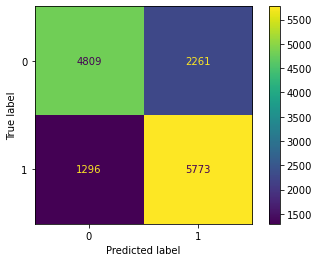

Result of selected features
 Accuracy: 0.7419902397623594
 F1 Score: 0.752711496746204


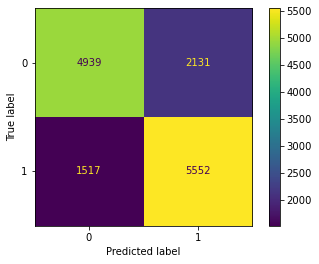

In [70]:
SVC_all_pred = SVC_all.predict(X_test)
SVC_sel_pred = SVC_sel.predict(sel_X_test)
print('Result of all features')
print(' Accuracy:', SVC_all.score(X_test, y_test))
print(' F1 Score:', f1_score(y_test, SVC_all_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, SVC_all_pred)).plot()
plt.show()
print('Result of selected features')
print(' Accuracy:', SVC_sel.score(sel_X_test, y_test))
print(' F1 Score:', f1_score(y_test, SVC_sel_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, SVC_sel_pred)).plot()
plt.show()

- 기존 Accuracy: 0.7470118113020723

#### Small Conclusion of SVC
1. 전체 feature 모두 사용할 때, selected feature보다 accuracy, f1 score 모두 앞선다.
2. 전체 feature 모두 사용했을 때 기존 Accuracy보다 소폭 상승하였으나, 유의미한 차이라고 보기는 힘들다.

### 4-2. DecisionTree

Result of all features
 Accuracy: 0.7361199519060754
 F1 Score: 0.7476496449103821


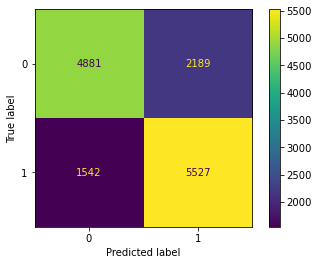

Result of selected features
 Accuracy: 0.7359784991866468
 F1 Score: 0.7469324113619416


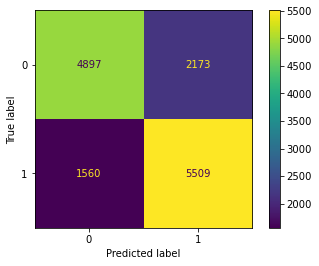

In [71]:
DT_all_pred = DT_all.predict(X_test)
DT_sel_pred = DT_sel.predict(sel_X_test)
print('Result of all features')
print(' Accuracy:', DT_all.score(X_test, y_test))
print(' F1 Score:', f1_score(y_test, DT_all_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, DT_all_pred)).plot()
plt.show()
print('Result of selected features')
print(' Accuracy:', DT_sel.score(sel_X_test, y_test))
print(' F1 Score:', f1_score(y_test, DT_sel_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, DT_sel_pred)).plot()
plt.show()

- 기존 Accuracy: 0.6615741526622532
- 기존 f1 score: 0.6555318781316593

#### Small Conclusion of DecisionTree
1. 전체 feature 모두 사용할 때, selected feature보다 accuracy, f1 score 모두 미세하게 앞선다.
2. 두 결과 모두 기존 대비 성능이 월등히 상승하였다.
3. 튜닝 전 모델의 경우, train set에 overfitting 되었음이 자명해 보인다.
4. 전체 feature와 selected feature 사용으로 인한 결과의 큰 차이가 없는 것으로 보아, feature selection 과정이 많은 정보를 손실시킨 것 같지는 않다.
5. 복잡도 측면에서는 feature selection이 적절할 수 있으나, 그럼에도 사용이 적절하다고 결론 지을 수는 없다.

### 4-3. LogisticRegression

Result of all features
 Accuracy: 0.7459509159063583
 F1 Score: 0.7505209056813447


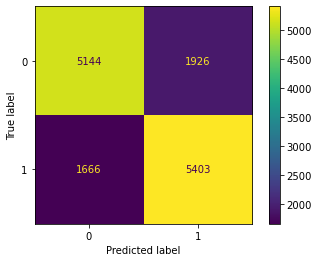

Result of selected features
 Accuracy: 0.7422731452012165
 F1 Score: 0.7475055432372505


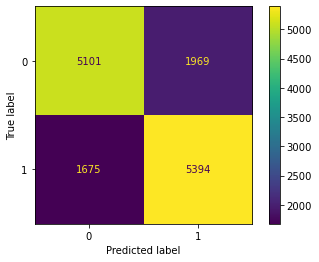

In [74]:
LR_all_pred = LR_all.predict(X_test)
LR_sel_pred = LR_sel.predict(sel_X_test)
print('Result of all features')
print(' Accuracy:', LR_all.score(X_test, y_test))
print(' F1 Score:', f1_score(y_test, LR_all_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, LR_all_pred)).plot()
plt.show()
print('Result of selected features')
print(' Accuracy:', LR_sel.score(sel_X_test, y_test))
print(' F1 Score:', f1_score(y_test, LR_sel_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, LR_sel_pred)).plot()
plt.show()

- 기존 Accuracy: 0.7457703842018899
- 기존 f1 score: 0.7509285437108488

#### Small Conclusion of Logistic Regression
1. 전체 feature 모두 사용할 때, selected feature보다 accuracy, f1 score 모두 미세하게 앞선다.
2. 기존 대비 전체 feature를 모두 사용한 경우 accuracy는 소폭 상승하고, f1 score는 소폭 감소하였다.
3. 그러나 유의미한 차이가 있다고 보기는 어렵다.
4. Selected feature의 경우 기존 대비 accuracy, f1 score 모두 감소하였다.
5. 역시 feature selection이 적절하다고 말할 수는 없다.

### 4-4. MLP

Result of all features
 Accuracy: 0.7485677912157861
 F1 Score: 0.7644915534945347


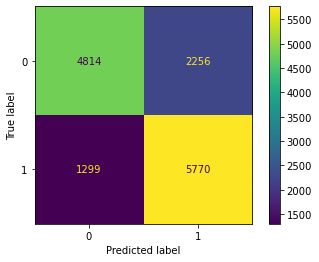

Result of selected features
 Accuracy: 0.7460216422660726
 F1 Score: 0.7522935779816513


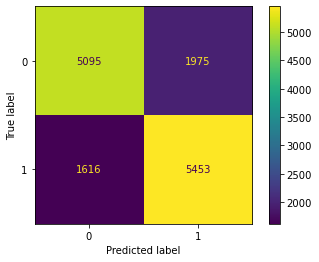

In [75]:
MLP_all_pred = MLP_all.predict(X_test)
MLP_sel_pred = MLP_sel.predict(sel_X_test)
print('Result of all features')
print(' Accuracy:', MLP_all.score(X_test, y_test))
print(' F1 Score:', f1_score(y_test, MLP_all_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, MLP_all_pred)).plot()
plt.show()
print('Result of selected features')
print(' Accuracy:', MLP_sel.score(sel_X_test, y_test))
print(' F1 Score:', f1_score(y_test, MLP_sel_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, MLP_sel_pred)).plot()
plt.show()

- 기존 Accuracy: 0.7495048944717931
- 기존 f1 score: 0.762359761661925

#### Small Conclusion of MLP
1. 전체 feature 모두 사용할 때, selected feature보다 accuracy, f1 score 모두 미세하게 앞선다.
2. 기존 대비 전체 feature를 모두 사용한 경우 accuracy는 소폭 감소하고, f1 score는 소폭 증가하였다.
3. 역시 유의미한 차이가 있다고 보기는 어렵다.
4. Selected feature의 경우 기존 대비 accuracy, f1 score 모두 감소하였다.
5. 마찬가지로 feature selection이 적절하다고 말할 수 없다.

### 4-5. RandomForest

Result of all features
 Accuracy: 0.7476483485395007
 F1 Score: 0.7592442645074223


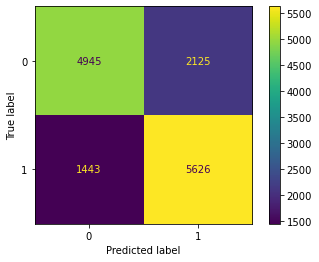

Result of selected features
 Accuracy: 0.7427682297192163
 F1 Score: 0.7541404718447913


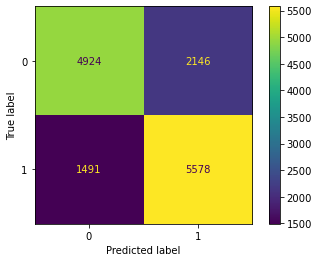

In [76]:
RF_all_pred = RF_all.predict(X_test)
RF_sel_pred = RF_sel.predict(sel_X_test)
print('Result of all features')
print(' Accuracy:', RF_all.score(X_test, y_test))
print(' F1 Score:', f1_score(y_test, RF_all_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, RF_all_pred)).plot()
plt.show()
print('Result of selected features')
print(' Accuracy:', RF_sel.score(sel_X_test, y_test))
print(' F1 Score:', f1_score(y_test, RF_sel_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, RF_sel_pred)).plot()
plt.show()

- 기존 Accuracy: 0.7235896565382222
- 기존 f1 score: 0.7331038627547398

#### Small Conclusion of RandomForest
1. 전체 feature 모두 사용할 때, selected feature보다 accuracy, f1 score 모두 앞선다.
2. 두 결과 모두 기존 대비 성능이 명확히 상승하였다.
3. DecisionTree와 마찬가지로 feature selection으로 인한 정보 손실이 크지는 않은 것 같으며, 복잡도의 이점이 있음에도 feature selection이 꼭 좋다고 말할 수는 없다.

### 4-6. AdaBoost

Result of all features
 Accuracy: 0.7480727066977862
 F1 Score: 0.7538695411829741


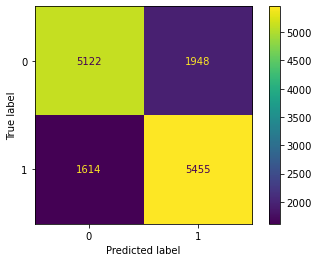

Result of selected features
 Accuracy: 0.7446778414315015
 F1 Score: 0.7501730103806228


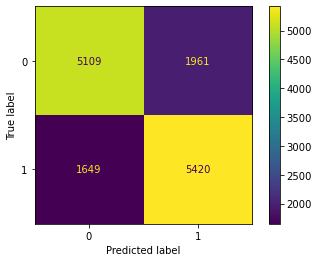

In [77]:
AB_all_pred = AB_all.predict(X_test)
AB_sel_pred = AB_sel.predict(sel_X_test)
print('Result of all features')
print(' Accuracy:', AB_all.score(X_test, y_test))
print(' F1 Score:', f1_score(y_test, AB_all_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, AB_all_pred)).plot()
plt.show()
print('Result of selected features')
print(' Accuracy:', AB_sel.score(sel_X_test, y_test))
print(' F1 Score:', f1_score(y_test, AB_sel_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, AB_sel_pred)).plot()
plt.show()

- 기존 Accuracy: 0.7466757200248967
- 기존 f1 score: 0.7527475561937372

#### Small Conclusion of AdaBoost
1. 전체 feature 모두 사용할 때, selected feature보다 accuracy, f1 score 모두 앞선다.
2. 기존 대비 전체 feature 사용 결과는 accuracy, f1 score 모두 미세한 성능 향상이 있다.
3. 그러나 feature selection을 진행할 경우 accuracy는 매우 미세하게, 즉 유의미한 차이가 없는 정도 상승하였으나, f1 score는 미세하게 감소하였다.
4. 역시 feature selection이 매력적이지 않다.

## 5. Conclusion
### Accuracy
1. Accuracy의 경우 MLP에서 가장 높고(0.7486), 다음은 SVC(poly, degree=2)가 높다(0.7484).
2. Tree 계열의 경우 AdaBoost가 0.7481로 가장 높다.  

### F1 Score
1. F1 Score의 경우 역시 MLP가 가장 높고(0.76449), 다음은 SVC로(0.76448) 그 차이가 미미하다.
2. Tree 계열에서는 RandomForest가 0.7592로 가장 높다.  

### About Feature Selection
1. Tree 기반 모델들(DecisionTree, RandomForest, AdaBoost)의 RFE 결과를 바탕으로 진행한만큼, Tree 기반 모델들에서는 전체 feature를 모두 사용한 결과와 selected feature를 사용한 결과의 차이가 미미하다.
2. 그러나 SVC, LogisticRegression, MLP에서는 명확히 차이가 나타난다.
3. 즉, feature selection이 정보를 손실시켰음이 자명하다.
4. 따라서 feature selection이 적절하다고 볼 수 없다.
5. 특히 EDA 과정에서 각 feature 별로 차트를 보아도 완전히 무의미한 feature가 있다고 보기 힘들었다.
6. 또한 변수들 간의 Correlation을 보아도 필수적으로 제거할 만한 feature가 있어보이지는 않았다.

### Best Model
1. MLP(hidden_layer_sizes=(32, 32), activation=logistic, using all features)
2. SVC(C=10, kernel=poly, degree=2, using all features)
- MLP, SVC 두 모델 간의 유의미한 차이가 있다고 보지는 않는다.
- 그러나 이 두 모델이 다른 모델들에 비해 적절함은 확실하다.  

### About Domain
1. 결과적으로 데이터셋은 당뇨병 환자를 예측하는 것이고, 이 모델의 결과를 바탕으로 정밀한 검사를 진행할 것으로 예상한다.
2. 따라서 False Positive를 허용하더라도, False Negative는 최대한 줄이는 것이 적절할 것으로 판단된다.
3. 이 도메인적 이유에 의해 SVC, MLP가 역시 가장 적절하고, 그 다음은 RandomForest와 DecisionTree라 판단한다.
4. 반면 AdaBoost와 LogisticRegression은 사용이 적절하지 못하다 생각한다.
5. Feature Selection의 경우 해당 관점에서 MLP, SVC에서 특히 사용이 부적절하다.

### 5-1. More About Tree Models

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')


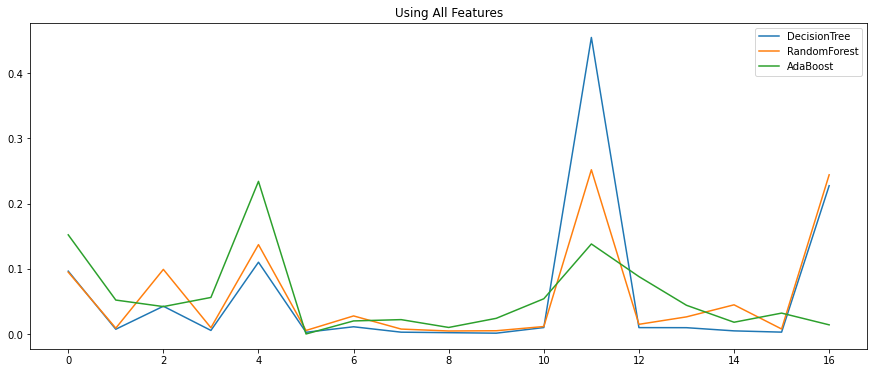

In [98]:
print(X_train.columns)
fig = plt.figure(figsize=(15,6))
plt.plot(DT_all.feature_importances_, label='DecisionTree')
plt.plot(RF_all.feature_importances_, label='RandomForest')
plt.plot(AB_all.feature_importances_, label='AdaBoost')
plt.title('Using All Features')
plt.legend()
plt.show()

In [102]:
for i, j in enumerate(X_train.columns):
    print((i, j), end=' ')

(0, 'Age') (1, 'Sex') (2, 'HighChol') (3, 'CholCheck') (4, 'BMI') (5, 'Smoker') (6, 'HeartDiseaseorAttack') (7, 'PhysActivity') (8, 'Fruits') (9, 'Veggies') (10, 'HvyAlcoholConsump') (11, 'GenHlth') (12, 'MentHlth') (13, 'PhysHlth') (14, 'DiffWalk') (15, 'Stroke') (16, 'HighBP') 

Index(['Age', 'BMI', 'GenHlth', 'MentHlth', 'HighBP', 'HighChol',
       'HeartDiseaseorAttack', 'PhysHlth', 'Stroke'],
      dtype='object')


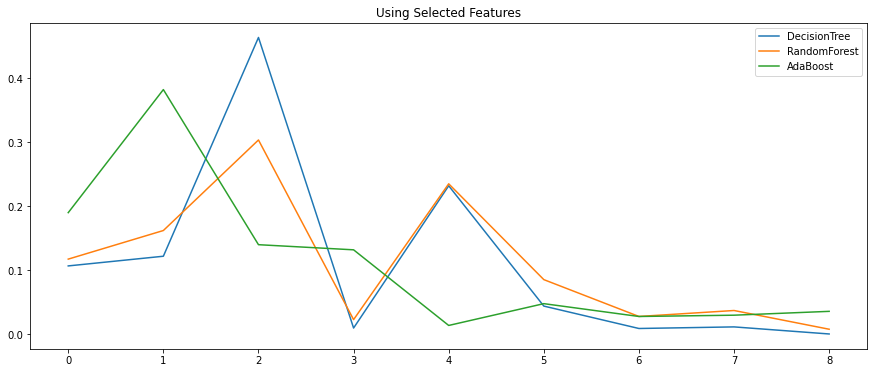

In [101]:
print(sel_X_train.columns)
fig = plt.figure(figsize=(15,6))
plt.plot(DT_sel.feature_importances_, label='DecisionTree')
plt.plot(RF_sel.feature_importances_, label='RandomForest')
plt.plot(AB_sel.feature_importances_, label='AdaBoost')
plt.title('Using Selected Features')
plt.legend()
plt.show()

In [103]:
for i, j in enumerate(sel_X_train.columns):
    print((i, j), end=' ')

(0, 'Age') (1, 'BMI') (2, 'GenHlth') (3, 'MentHlth') (4, 'HighBP') (5, 'HighChol') (6, 'HeartDiseaseorAttack') (7, 'PhysHlth') (8, 'Stroke') 

- Must에 해당하던 feature들(Selected Feature의 index 0~4)이 전체 feature를 사용한 모델에서도 feature importance가 높게 나타남을 확인할 수 있다.
- 단 Feature Selection에서도 헷갈렸던 MentHlth의 경우, AdaBoost를 제외하고는 feature importance가 selected, all 모두 낮게 나오고 있음을 확인할 수 있다.
- *GenHlth(평상시 건강에 대한 주관적 척도), BMI, HighBP(고혈압)*가 중요하게 작용한다고 판단한다.  

**DecisionTree 시각화의 경우, 알아보기 어려워 포함하지 않았습니다.**

#### All Features Confusion Matrix (DecsionTree, RandomForest, AdaBoost 순)

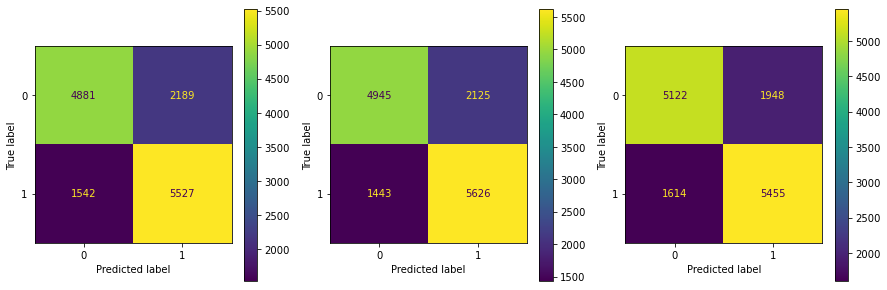

In [110]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ConfusionMatrixDisplay(confusion_matrix(y_test, DT_all_pred)).plot(ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix(y_test, RF_all_pred)).plot(ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix(y_test, AB_all_pred)).plot(ax=ax[2])
plt.show()

- 앞서 설명한 도메인적 맥락에서, DecisionTree와 RandomForest가 AdaBoost보다 도메인에 적합하다고 판단한다.
- DecisionTree와 RandomForest 중애서는 FalseNegative가 낮고 TruePositive가 높은 RandomForest가 더 적합하다고 판단한다.
- 최종적으로 MLP가 가장 적합하였기에 큰 의미는 없다고 생각하며, Feature importance 정도 참고할 수 있을 것 같다.

#### Selected Features Confusion Matrix (DecsionTree, RandomForest, AdaBoost 순)

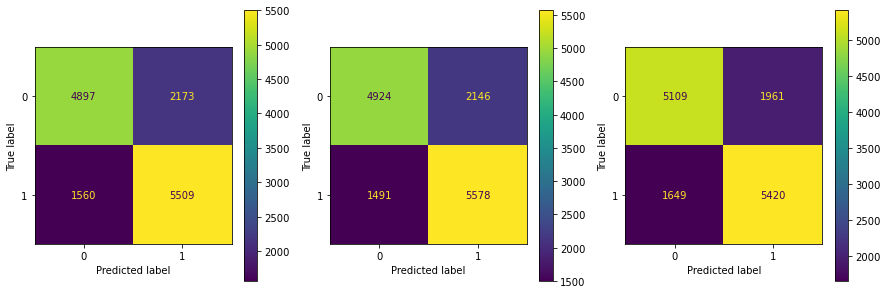

In [111]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ConfusionMatrixDisplay(confusion_matrix(y_test, DT_sel_pred)).plot(ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix(y_test, RF_sel_pred)).plot(ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix(y_test, AB_sel_pred)).plot(ax=ax[2])
plt.show()

- 앞의 All Features Confusion Matrix와 비교
1. DecisionTree: TrueNegative, FalseNegative는 소폭 증가하고 TruePositive, FalsePositive는 소폭 감소하여 오히려 도메인에 적합하지 않다.
2. RandomForest: FalseNegative와 FalsePositive 증가하고, TrueNegative와 TruePositive는 감소하였다. 즉, Accuracy의 감소로 도메인에 적합하지 않다.
3. AdaBoost: RandomForest와 동일하게 적합하지 않다.  
- Selected Feature를 사용한 3개의 Tree 및 앙상블 모델 모두 사용이 적절하지 않다.

### 5-2. More about MLP
**LogisticRegression의 경우 MLP의 하위호환이라 판단하여 생략하겠습니다. (해당 실험 내 구조, 결과 모두)**

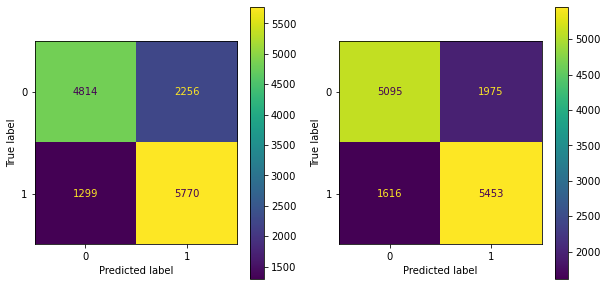

In [112]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay(confusion_matrix(y_test, MLP_all_pred)).plot(ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix(y_test, MLP_sel_pred)).plot(ax=ax[1])
plt.show()

- All Features (좌), Selected Features (우)에 대한 Confusion Matrix 비교
1. Accuracy와 F1 score 모두 전체 Feature에 대한 모델이 앞서고 있으나, 물론 negligible으로 판단할 수도 있다.
2. 그러나 도메인적 이유에서 FalseNegative는 명확히 낮고, TruePositive가 명확히 높은 전체 Feature에 대한 모델이 더 적합하다.
3. 위의 이유로 FalsePositive가 꽤 차이 나지만 충분히 용인할 수 있다.

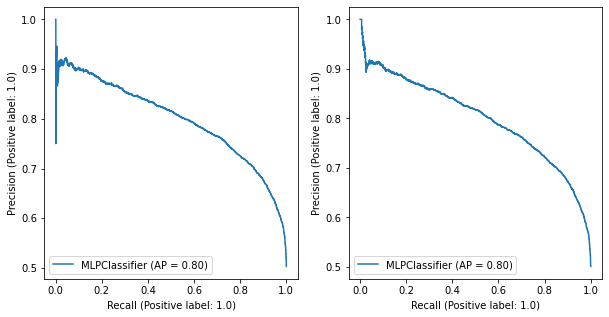

In [116]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
PrecisionRecallDisplay.from_estimator(MLP_all, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(MLP_sel, sel_X_test, y_test, ax=ax[1])
plt.show()

- All Features (좌), Selected Features (우)에 대한 Precision-Recall Curve는 위와 같다.
- 두 그래프 간 큰 차이는 없고, 도메인적으로 Precision보다는 Recall에 우선순위를 두어야 한다.

In [132]:
from sklearn.metrics import roc_curve

def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-5,100])
    plt.ylim([0,105])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

All Features 0.8262068000951623


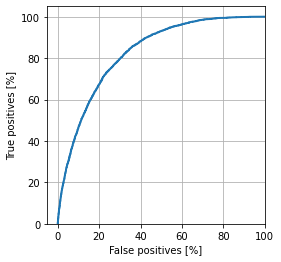

Selected Features 0.8242186785620744


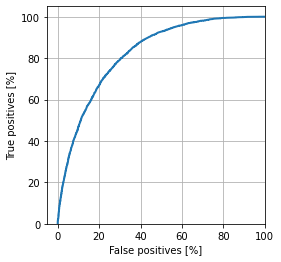

In [136]:
from sklearn.metrics import roc_auc_score

y_prob = MLP_all.predict_proba(X_test)[:, 1]
y_prob_sel = MLP_sel.predict_proba(sel_X_test)[:, 1]
print('All Features', roc_auc_score(y_test, y_prob))
plot_roc('All Features', y_test, y_prob)
plt.show()
print('Selected Features', roc_auc_score(y_test, y_prob_sel))
plot_roc('Selected Features', y_test, y_prob_sel)
plt.show()

- All Features (위), Selected Features (아래)에 대한 ROC, AUC는 위와 같다.
- All Features의 AUC가 미세하게 큰 것 말고는 큰 차이가 없다.

### 5-3. More about SVC

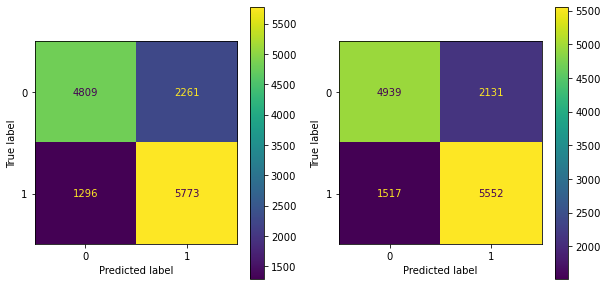

In [137]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay(confusion_matrix(y_test, SVC_all_pred)).plot(ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix(y_test, SVC_sel_pred)).plot(ax=ax[1])
plt.show()

- All Features (좌), Selected Features (우)에 대한 Confusion Matrix 비교
1. Accuracy와 F1 score 모두 전체 Feature에 대한 모델이 앞서고 있다.
2. 도메인적 이유에서 FalseNegative는 명확히 낮고, TruePositive가 명확히 높은 전체 Feature에 대한 모델이 더 적합하다.
3. 역시 FalsePositive의 차이가 있지만 충분히 용인할 수 있다.

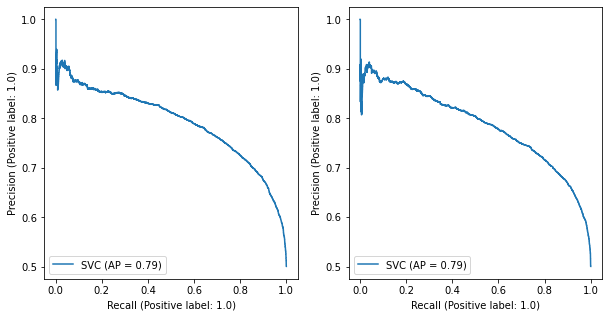

In [138]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
PrecisionRecallDisplay.from_estimator(SVC_all, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(SVC_sel, sel_X_test, y_test, ax=ax[1])
plt.show()

- All Features (좌), Selected Features (우)에 대한 Precision-Recall Curve는 위와 같다.
- 역시 두 그래프 간 큰 차이는 없고, 도메인적으로 Precision보다는 Recall에 우선순위를 두어야 한다.

### Summary
1. 이미 잘 정돈된 데이터셋이었기에 Feature Selection이 유의미하다고 보기 힘들었다.
2. 또한 Parameter Tuning으로 눈에 띄는 성능의 향상은 없었다.
3. 따라서 정성적 판단을 추가하여 MLP와 SVM을 Best Model로 선정하였다.
4. Threshold 조절을 통해 FalseNegative의 비율을 최소화하는 것이 중요할 것으로 예상된다.

### EOD